## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 4
---------------------------------------

GOALS:

1. Answer all the questions from the lecture.
2. Practice making graphs with different types of data

----------------------------------------------------------

For this homework you will load the L data and practice making different kinds of plots!

This homework has **7 questions** from the lecture and **2 Problems** and a **Challenge**.

NOTE:
* Questions tend to be short answer or things were you change very minor parts of some given code.
* Problems tend to be more involved, like trying out our methods on a new column.
* Challenge problems are optional! They are intended to challenge you to reach beyond the basics of the class. I hope you will try the challenge problems!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

### Load the Data

In [2]:
file_location = 'https://joannabieri.com/introdatascience/data/loans_full_schema.csv'
DF = pd.read_csv(file_location)

In [3]:
DF

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


### Check Observations and Variables

**Q1** How many **observations** are there?

**Q2** How many **variables** are there?

In [3]:
1. There are 10000 observations here.
2. There are 55 different variables.

**(Double CLick Here to answer the questions))**

### Reduce the number of variables

In [4]:
my_variables = ['loan_amount',
                'interest_rate',
                'term','grade',
                'state',
                'annual_income',
                'homeownership',
                'debt_to_income']

DF = DF[my_variables]

DF

,loan_amount,interest_rate,term,grade,state,annual_income,homeownership,debt_to_income
0,28000,14.07,60,C,NJ,90000.0,MORTGAGE,18.01
1,5000,12.61,36,C,HI,40000.0,RENT,5.04
2,2000,17.09,36,D,WI,40000.0,RENT,21.15
3,21600,6.72,36,A,PA,30000.0,RENT,10.16
4,23000,14.07,36,C,CA,35000.0,RENT,57.96
...,...,...,...,...,...,...,...,...
9995,24000,7.35,36,A,TX,108000.0,RENT,22.28
9996,10000,19.03,36,D,PA,121000.0,MORTGAGE,32.38
9997,30000,23.88,36,E,CT,67000.0,MORTGAGE,45.26
9998,24000,5.32,36,A,WI,80000.0,MORTGAGE,11.99


**Q3** Check out each of the variables (columns):

1. What does each column tell you? What are the units?
2. Is the data numerical? If so is it continuous or discrete?
3. If the categorical? If so is it ordinal or nominal?

<a href="https://www.openintro.org/data/index.php?data=loans_full_schema"> Here is a link to the full data description if you need to look up some of the column names.</a>

-----------------------------------------

Each column gives you the information on the student such as loan amount, grades, etc. The unites vary per column like the loan amount in in the unit of dollars, the grade column is based off of an A-F grading system. Yes the data is numerical and it is discreat because a student can only recieve a finite amount of a loan. It is not categorical..

### Here is Example Code for a simple Histogram

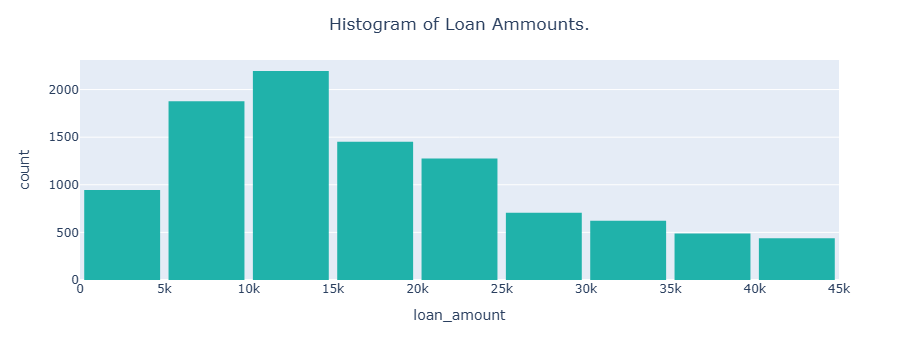

In [9]:
fig = px.histogram(DF,
                   nbins=10,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()

**Q4** You try changing the number of bins **nbins** what do you notice? Are there good choices? Bad choices?


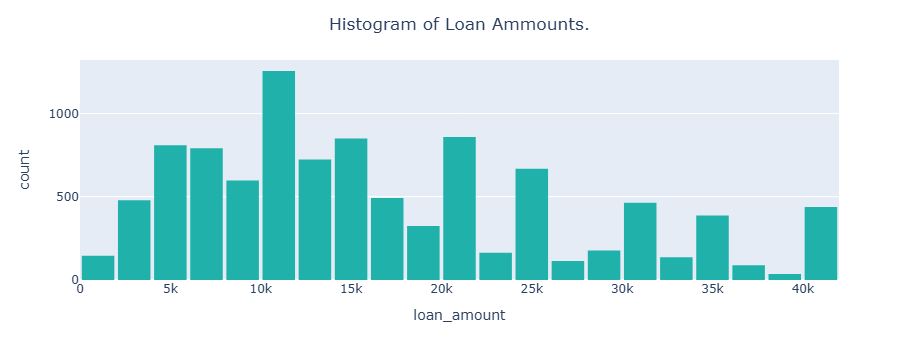

In [8]:
fig = px.histogram(DF,
                   nbins=30,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()


It shows more bars on the bar graph. There are more students with smaller loan amaounts.

**Problem 1** Create a histogram of your own! Try making a histogram of one of the other pieces of numerical data. Make it as fancy as you want. Include some categorical information. Do you learn anything from your graph? If so what?


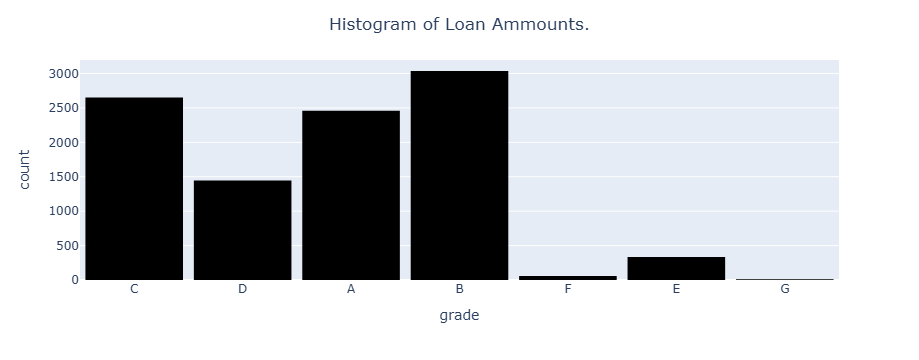

In [16]:
fig = px.histogram(DF,
                   nbins=5,
                   x='grade',
                   color_discrete_sequence=['black'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()



### Here is example code for a histogram with a box plot included.

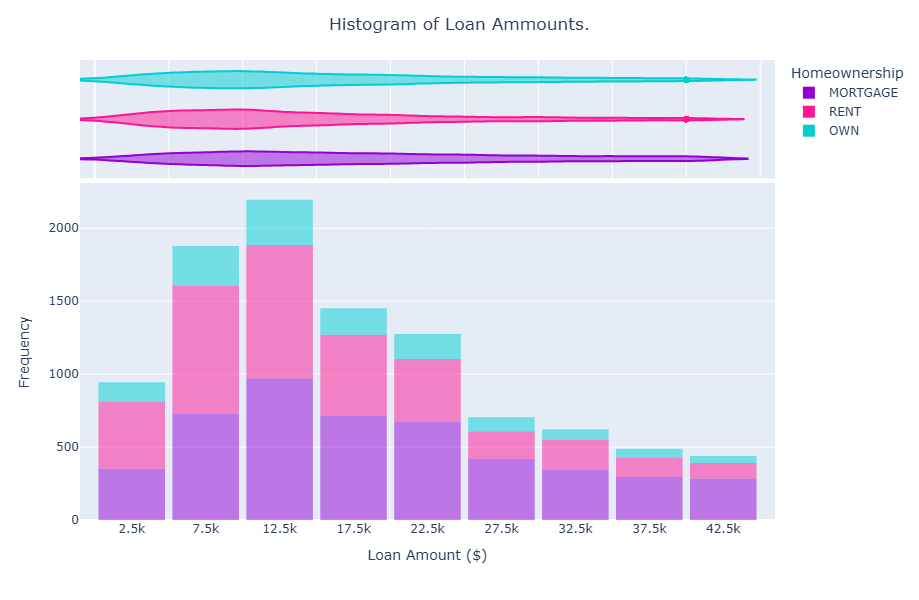

In [17]:
fig = px.histogram(DF,
                   nbins=9,
                   x='loan_amount',
                   color='homeownership',
                   opacity=0.5,
                   color_discrete_map={'MORTGAGE': 'darkviolet', 
                                       'RENT': 'deeppink', 
                                       'OWN': 'darkturquoise'},
                   marginal="violin"
                   )

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5,
                  xaxis={'range':[-1000, 46000]},
                  xaxis_title="Loan Amount ($)",
                  yaxis_title="Frequency",
                  legend_title="Homeownership",
                  autosize=False,
                  width=800,
                  height=600)
fig.show()

**Q5** Change the above plot to marginal="violin" and see what changes. Make some observations about the graph

It changes the graph from a bar to more of a flowy chart that shows the density of each loan amount.

In [18]:
counts = DF['homeownership'].value_counts()
show(counts)

Loading ITables v2.5.2 from the internet... (need help?)


**Q6** Copy and past the code above, but change it to get value counts for one of the other categorical columns

In [19]:
counts = DF['annual_income'].value_counts()
show(counts)


Loading ITables v2.5.2 from the internet... (need help?)


### Here is example code for a bar plot

In [11]:
fig = px.bar(DF,
            x='homeownership',
            color_discrete_sequence=['lightseagreen'])
fig.update_traces(dict(marker_line_width=0))
fig.show()

**Q7** Can you figure out how to add x labels, y labels, and a title to this graph?

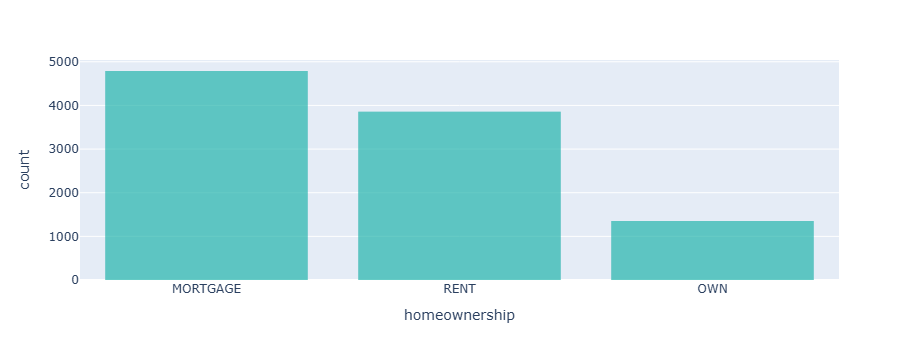

In [20]:
fig = px.bar(DF,
            x='homeownership',
            color_discrete_sequence=['lightseagreen'])
fig.update_traces(dict(marker_line_width=0))
fig.show()

**Problem 2** Try to make your own bar plot of one of the other categorical columns. Add some categorical fill or facets. See how fancy you can make your graph. Make sure it is also still really informative.

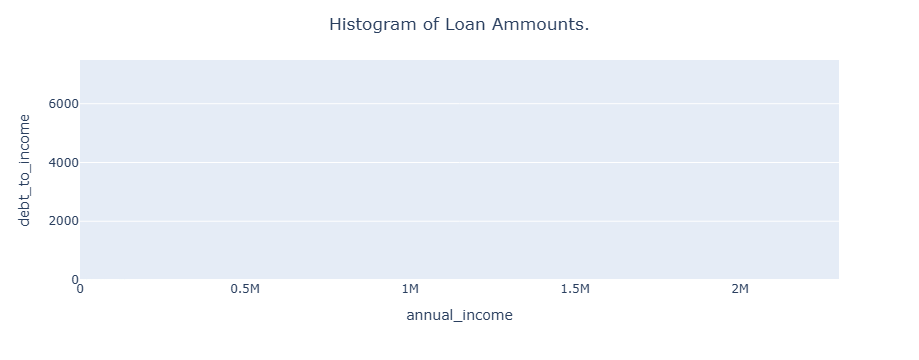

In [28]:
fig = px.bar(DF,
            x='annual_income',
            y='debt_to_income',
            color_discrete_sequence=['lightseagreen'])
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()

### Challenge:

Here is a data set that contains demographic data from the Behavioral Risk Factors Surveillance System from the CDC. It is a small subset of 60 observations.

Here is a link to the variable information:

<a href="https://www.openintro.org/data/index.php?data=cdc.samp" target="_blank">https://www.openintro.org/data/index.php?data=cdc.samp</a>

Your goal is to look at the columns and then make an graph from the data using what we learned in today's class.

In [14]:
file_location = 'https://joannabieri.com/introdatascience/data/cdc.samp.csv'
DF_new = pd.read_csv(file_location)
show(DF_new)

In [19]:
DF

,loan_amount,interest_rate,term,grade,state,annual_income,homeownership,debt_to_income
0,28000,14.07,60,C,NJ,90000.0,MORTGAGE,18.01
1,5000,12.61,36,C,HI,40000.0,RENT,5.04
2,2000,17.09,36,D,WI,40000.0,RENT,21.15
3,21600,6.72,36,A,PA,30000.0,RENT,10.16
4,23000,14.07,36,C,CA,35000.0,RENT,57.96
...,...,...,...,...,...,...,...,...
9995,24000,7.35,36,A,TX,108000.0,RENT,22.28
9996,10000,19.03,36,D,PA,121000.0,MORTGAGE,32.38
9997,30000,23.88,36,E,CT,67000.0,MORTGAGE,45.26
9998,24000,5.32,36,A,WI,80000.0,MORTGAGE,11.99


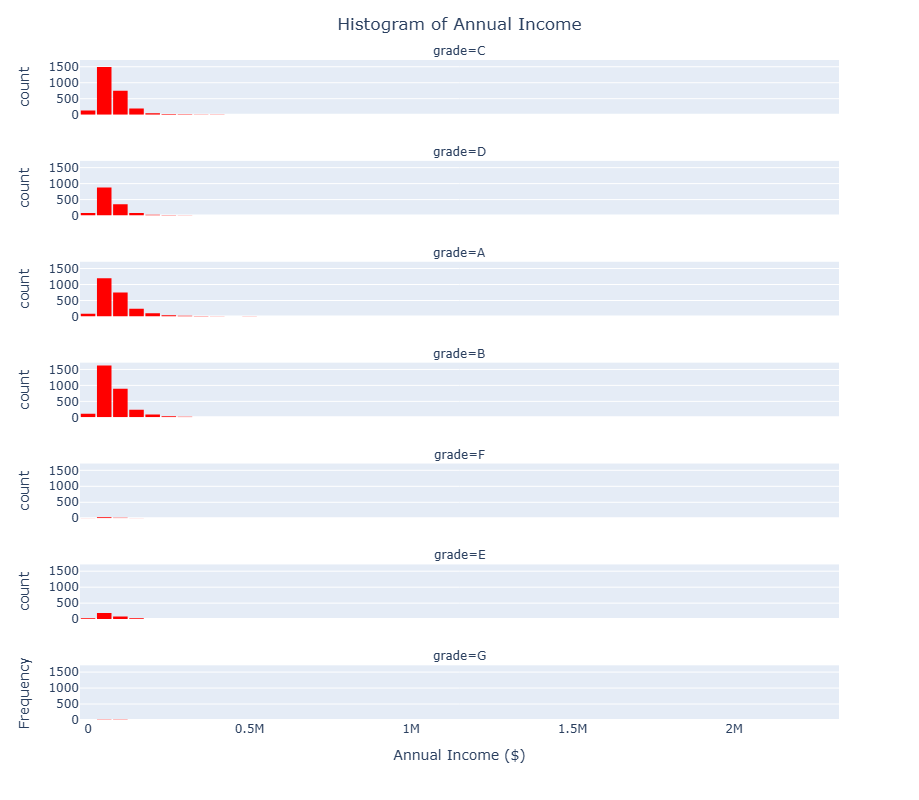

In [37]:
fig = px.histogram(DF,
                  x='annual_income',
                  nbins=64,
                  facet_col='grade',
                  facet_col_wrap=1,
                  color_discrete_sequence=['red'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Annual Income',
                  title_x=0.5,
                  xaxis_title="Annual Income ($)",
                  yaxis_title="Frequency",
                  autosize=False,
                  width=800,
                  height=800)

fig.show()